<!-- #######  THIS IS A COMMENT - Visible only in the source editor #########-->
<div class="sc-hCpSHK kHubkf sc-gCnqgB ihvSFo">
<div class="sc-dKOINR hmOzNS">
<div class="sc-lidIEE guuNJg">
<h2 class="sc-brSamD sc-gFfkIj gjmKIa FlsnA">About Dataset</h2>
</div>
</div>
</div>
<div class="sc-jYjnuj bwRwco">
<div class="sc-dfDdDu dJaPrR">
<div>
<div class="sc-kGLCbq fAhUHg sc-bjdBbh bsRmbF">
<p>Let us breakdown each column in our dataset:</p>
<ol>
<li>
<p><strong>sex</strong>: This column represents the gender of the individuals (female- male).</p>
</li>
<li>
<p><strong>age</strong>: This column represents the age of the individuals in the dataset. Age is a crucial factor in assessing the risk of coronary heart disease.</p>
</li>
<li>
<p><strong>education</strong>: This column represents the level of education of the individuals. It could be coded using categorical values indicating different levels of education attainment.</p>
</li>
<li>
<p><strong>smokingStatus</strong>: This column likely represents the smoking status of the individuals, indicating whether they are smokers(yes), non-smokers(no).</p>
</li>
<li>
<p><strong>cigsPerDay</strong>: If an individual is a smoker, this column represents the number of cigarettes smoked per day.</p>
</li>
<li>
<p><strong>BPMeds</strong>: This column indicates whether the individual is taking blood pressure medications (binary: 0 for not taking, 1 for taking).</p>
</li>
<li>
<p><strong>prevalentStroke</strong>: This column indicates whether an individual has had a stroke prior to the study (binary: 0 for no, 1 for yes).</p>
</li>
<li>
<p><strong>prevalentHyp</strong>: This column indicates whether an individual has hypertension (binary: 0 for no, 1 for yes).</p>
</li>
<li>
<p><strong>diabetes</strong>: This column indicates whether an individual has diabetes (binary: 0 for no, 1 for yes).</p>
</li>
<li>
<p><strong>totChol</strong>: This column represents the total cholesterol level of the individuals.</p>
</li>
<li>
<p><strong>sysBP</strong>: This column represents the systolic blood pressure of the individuals.</p>
</li>
<li>
<p><strong>diaBP</strong>: This column represents the diastolic blood pressure of the individuals.</p>
</li>
<li>
<p><strong>BMI</strong>: This column represents the (BMI) of the individuals, which is a measure of body fat based on height and weight.</p>
</li>
<li>
<p><strong>heartRate</strong>: This column represents the resting heart rate of the individuals.</p>
</li>
<li>
<p><strong>glucose</strong>: This column represents the fasting blood glucose level of the individuals.</p>
</li>
<li>
<p><strong>CHDRisk</strong>: This column likely represents the Ten-Year Coronary Heart Disease (CHD) Risk for each individual, which is the target variable that you may want to predict or analyze.</p>
</li>
</ol>
</div>
</div>
</div>
</div>

In [221]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------
sns.set()

In [222]:
df = pd.read_csv('Heart_Disease.csv')
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.00,84.00,23.10,85,85,no


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


In [224]:
df = df.dropna()

In [225]:
df = df.rename(columns={'sex' : 'gender'})

In [226]:
df.shape[0]

3652

In [227]:
df = df.drop_duplicates()

In [228]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,"3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00"
mean,49.55,1.98,9.03,0.03,0.01,0.31,236.88,132.36,82.90,25.79,75.75,81.81
std,8.56,1.02,11.91,0.17,0.08,0.46,44.13,22.08,11.96,4.06,11.99,23.77
min,32.00,1.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,263.00,144.00,90.00,28.04,82.00,87.00
max,70.00,4.00,70.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3637 non-null   object 
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   smokingStatus    3637 non-null   object 
 4   cigsPerDay       3637 non-null   int64  
 5   BPMeds           3637 non-null   int64  
 6   prevalentStroke  3637 non-null   int64  
 7   prevalentHyp     3637 non-null   int64  
 8   diabetes         3637 non-null   object 
 9   totChol          3637 non-null   int64  
 10  sysBP            3637 non-null   float64
 11  diaBP            3637 non-null   float64
 12  BMI              3637 non-null   float64
 13  heartRate        3637 non-null   int64  
 14  glucose          3637 non-null   int64  
 15  CHDRisk          3637 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 483.0+ KB


In [230]:
df.head()

,gender,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.00,84.00,23.10,85,85,no


In [231]:
# BPMeds   prevalentStroke    prevalentHyp  
df['BPMeds'] = df['BPMeds'].astype('object') 
df['prevalentStroke'] = df['prevalentStroke'].astype('object') 
df['prevalentHyp'] = df['prevalentHyp'].astype('object') 

df.loc[:, 'BPMeds'] = df['BPMeds'].replace([0, 1], ['no', 'yes'])
df.loc[:, 'prevalentStroke'] = df['prevalentStroke'].replace([0, 1], ['no', 'yes'])
df.loc[:, 'prevalentHyp'] = df['prevalentHyp'].replace([0, 1], ['no', 'yes'])


# Univariate Analysis

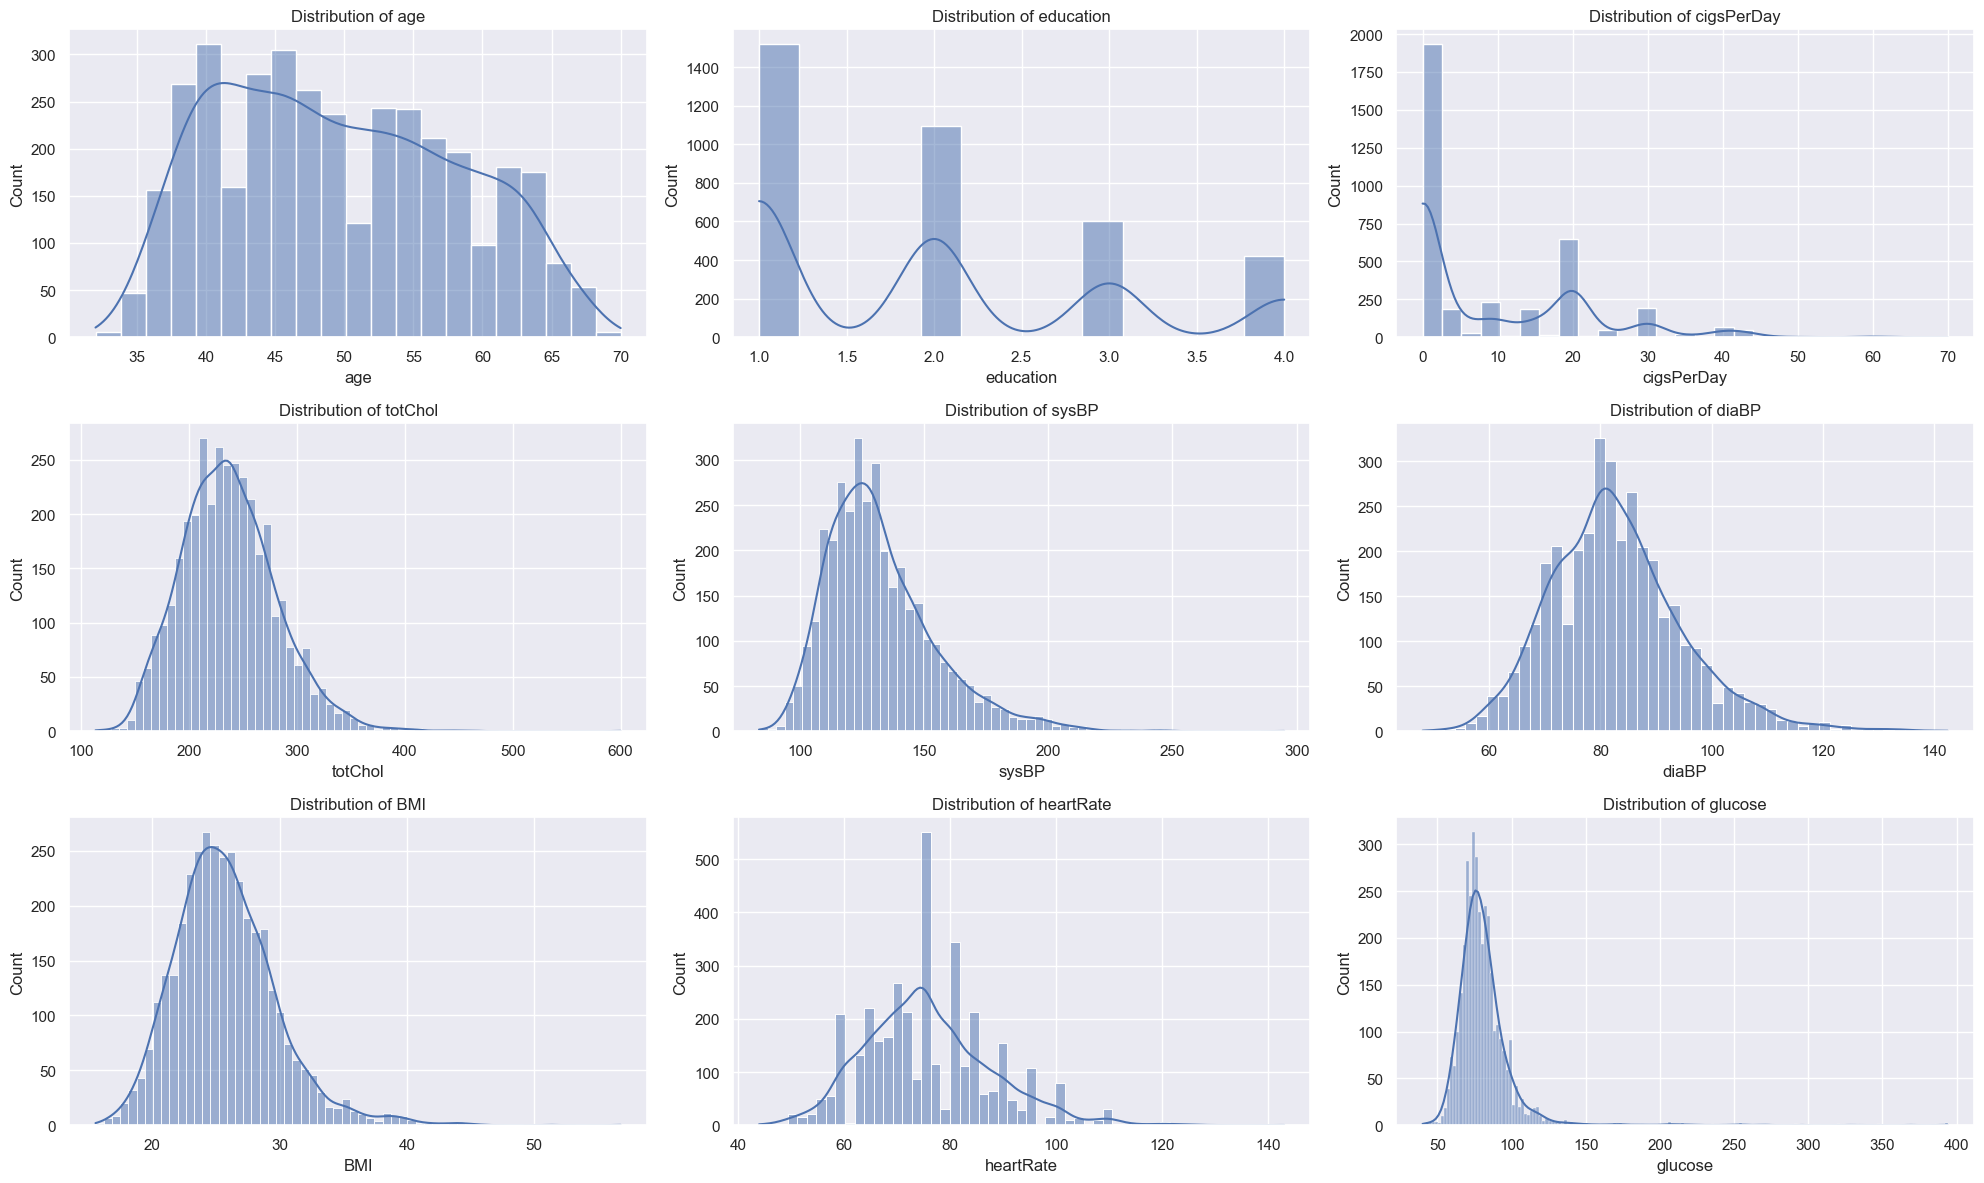

In [232]:
# Numerical Columns
plt.figure(figsize=(20, 12))
for e, i in enumerate(df.select_dtypes('number')):
    plt.subplot(3, 3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title('Distribution of ' + i);
    plt.tight_layout();

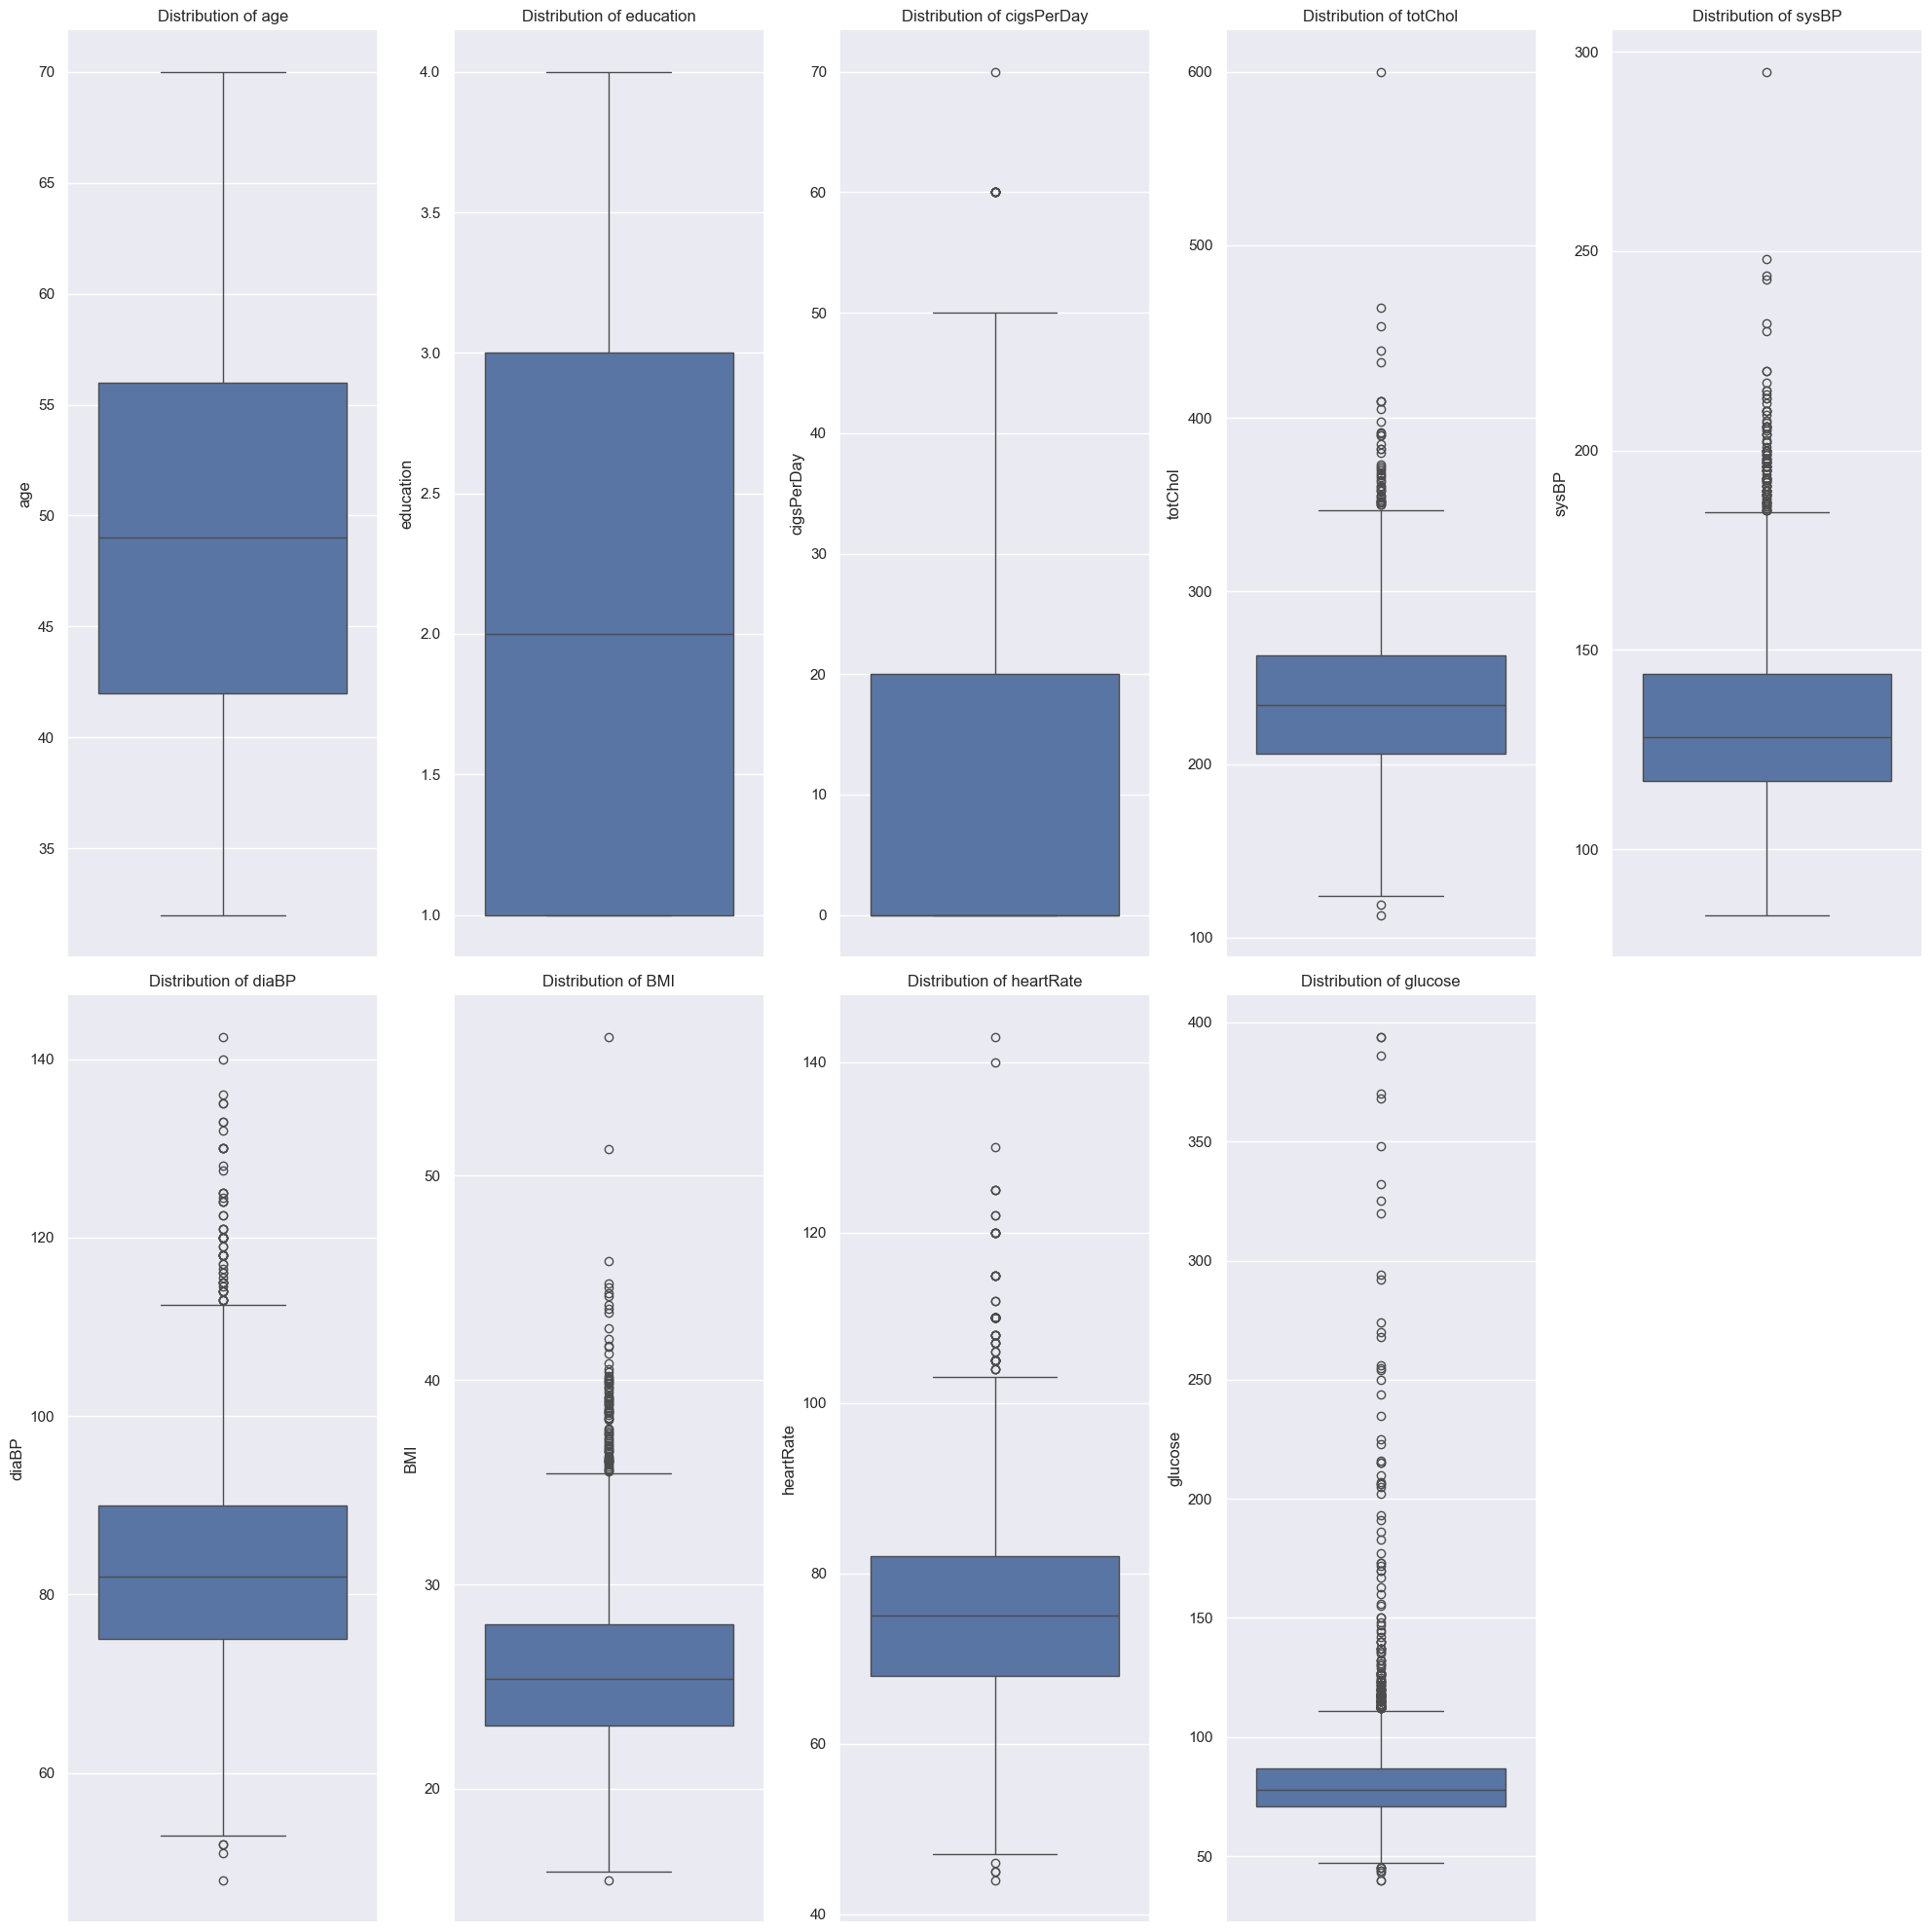

In [233]:
# Numerical Columns
plt.figure(figsize=(20, 20))
for e, i in enumerate(df.select_dtypes('number')):
    plt.subplot(2, 5, e+1)
    sns.boxplot(df[i])
    plt.title('Distribution of ' + i);
    plt.tight_layout();

totChol<br>
قيم الكوليسترول الكلي:<br>
النسبة الطبيعية: أقل من 125-200 ملغ/ ديسيلتر.<br>
فئة الخطر: 200-239 ملغ/ ديسيلتر.<br>
مرتفعة: 240 ملغ/ ديسيلتر فما فوق.<br>
منخفضة: أقل من 125 ملغ/ ديسيلتر.<br>


<table class="ms-rteTable-default" style="margin-left: auto; margin-right: auto;" border="2" width="100%" cellspacing="0">
<tbody>
<tr class="ms-rteTableHeaderRow-default">
<th class="ms-rteTableHeaderFirstCol-default" colspan="1" rowspan="1"><strong>فئة ضغط الدم</strong></th>
<th class="ms-rteTableHeaderOddCol-default" colspan="1" rowspan="1"><strong>​&nbsp; الانقباضي (العدد العلوي)</strong>
<div><strong>ملم زئبق</strong></div>
</th>
<th class="ms-rteTableHeaderEvenCol-default" colspan="1" rowspan="1">
<div><strong>​الانبساطي (العدد السفلي)</strong></div>
<div><strong>ملم زئبق</strong></div>
</th>
</tr>
<tr class="ms-rteTableOddRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>​ضغط دم مثالي</strong></th>
<td class="ms-rteTableOddCol-default">​أقل من 120</td>
<td class="ms-rteTableEvenCol-default">​أقل من 80</td>
</tr>
<tr class="ms-rteTableEvenRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>​</strong><strong>طبيعي</strong></th>
<td class="ms-rteTableOddCol-default">​120 &ndash; 129</td>
<td class="ms-rteTableEvenCol-default">​80 &ndash; 84</td>
</tr>
<tr class="ms-rteTableOddRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>​</strong><strong>مرحلة ما قبل ارتفاع الضغط</strong></th>
<td class="ms-rteTableOddCol-default">​130 - 139</td>
<td class="ms-rteTableEvenCol-default">​85 &ndash; 89</td>
</tr>
<tr class="ms-rteTableEvenRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>​</strong><strong>ضغط دم مرتفع (المرحلة الأولى)</strong></th>
<td class="ms-rteTableOddCol-default">​140 &ndash; 159</td>
<td class="ms-rteTableEvenCol-default">​90 &ndash; 99</td>
</tr>
<tr class="ms-rteTableOddRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>​</strong><strong>ضغط دم مرتفع (المرحلة الثانية)</strong></th>
<td class="ms-rteTableOddCol-default">​160 &ndash; 179</td>
<td class="ms-rteTableEvenCol-default">​100 &ndash; 109</td>
</tr>
<tr class="ms-rteTableEvenRow-default">
<th class="ms-rteTableFirstCol-default" colspan="1" rowspan="1"><strong>ضغط دم مرتفع (المرحلة الثالثة)</strong></th>
<td class="ms-rteTableOddCol-default">​أعلى من 180</td>
<td class="ms-rteTableEvenCol-default">​أعلى من 110</td>
</tr>
</tbody>
</table>

BMI<br>
between 18.5 and 24.9 – This is described as the 'healthy range'.<br> between 25 and 29.9 – This is described as overweight.<br> between 30 and 39.9 – This is described as obesity.<br> 40 or over – This is described as severe obesity

HeartRate<br>
- Normal from 60 to 100

Glocous
- Normal between 70 - 100

In [234]:
df.head()

,gender,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,no,no,no,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,no,no,no,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,no,no,no,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,no,no,yes,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,no,no,no,no,285,130.00,84.00,23.10,85,85,no


In [235]:
df['healthy'] = np.where(
    (df['cigsPerDay'] >= 0) & (df['cigsPerDay'] <= 20) &
    (df['BPMeds'] == 'no') &
    (df['prevalentStroke'] == 'no') &
    (df['prevalentHyp'] == 'no') &
    (df['diabetes'] == 'no') &
    (df['totChol'] > 125) & (df['totChol'] <= 200) &
    (df['sysBP'] >= 120) & (df['sysBP'] <= 129) &
    (df['diaBP'] >= 80) & (df['diaBP'] <= 84) &
    (df['BMI'] >= 18.5) & (df['BMI'] <= 29.9) &
    (df['heartRate'] >= 60) & (df['heartRate'] <= 100)&
    (df['glucose'] >= 70) & (df['glucose'] <= 100),
    'yes', 'no'
)

In [236]:
df[df.healthy == 'yes']['healthy'].count()

24

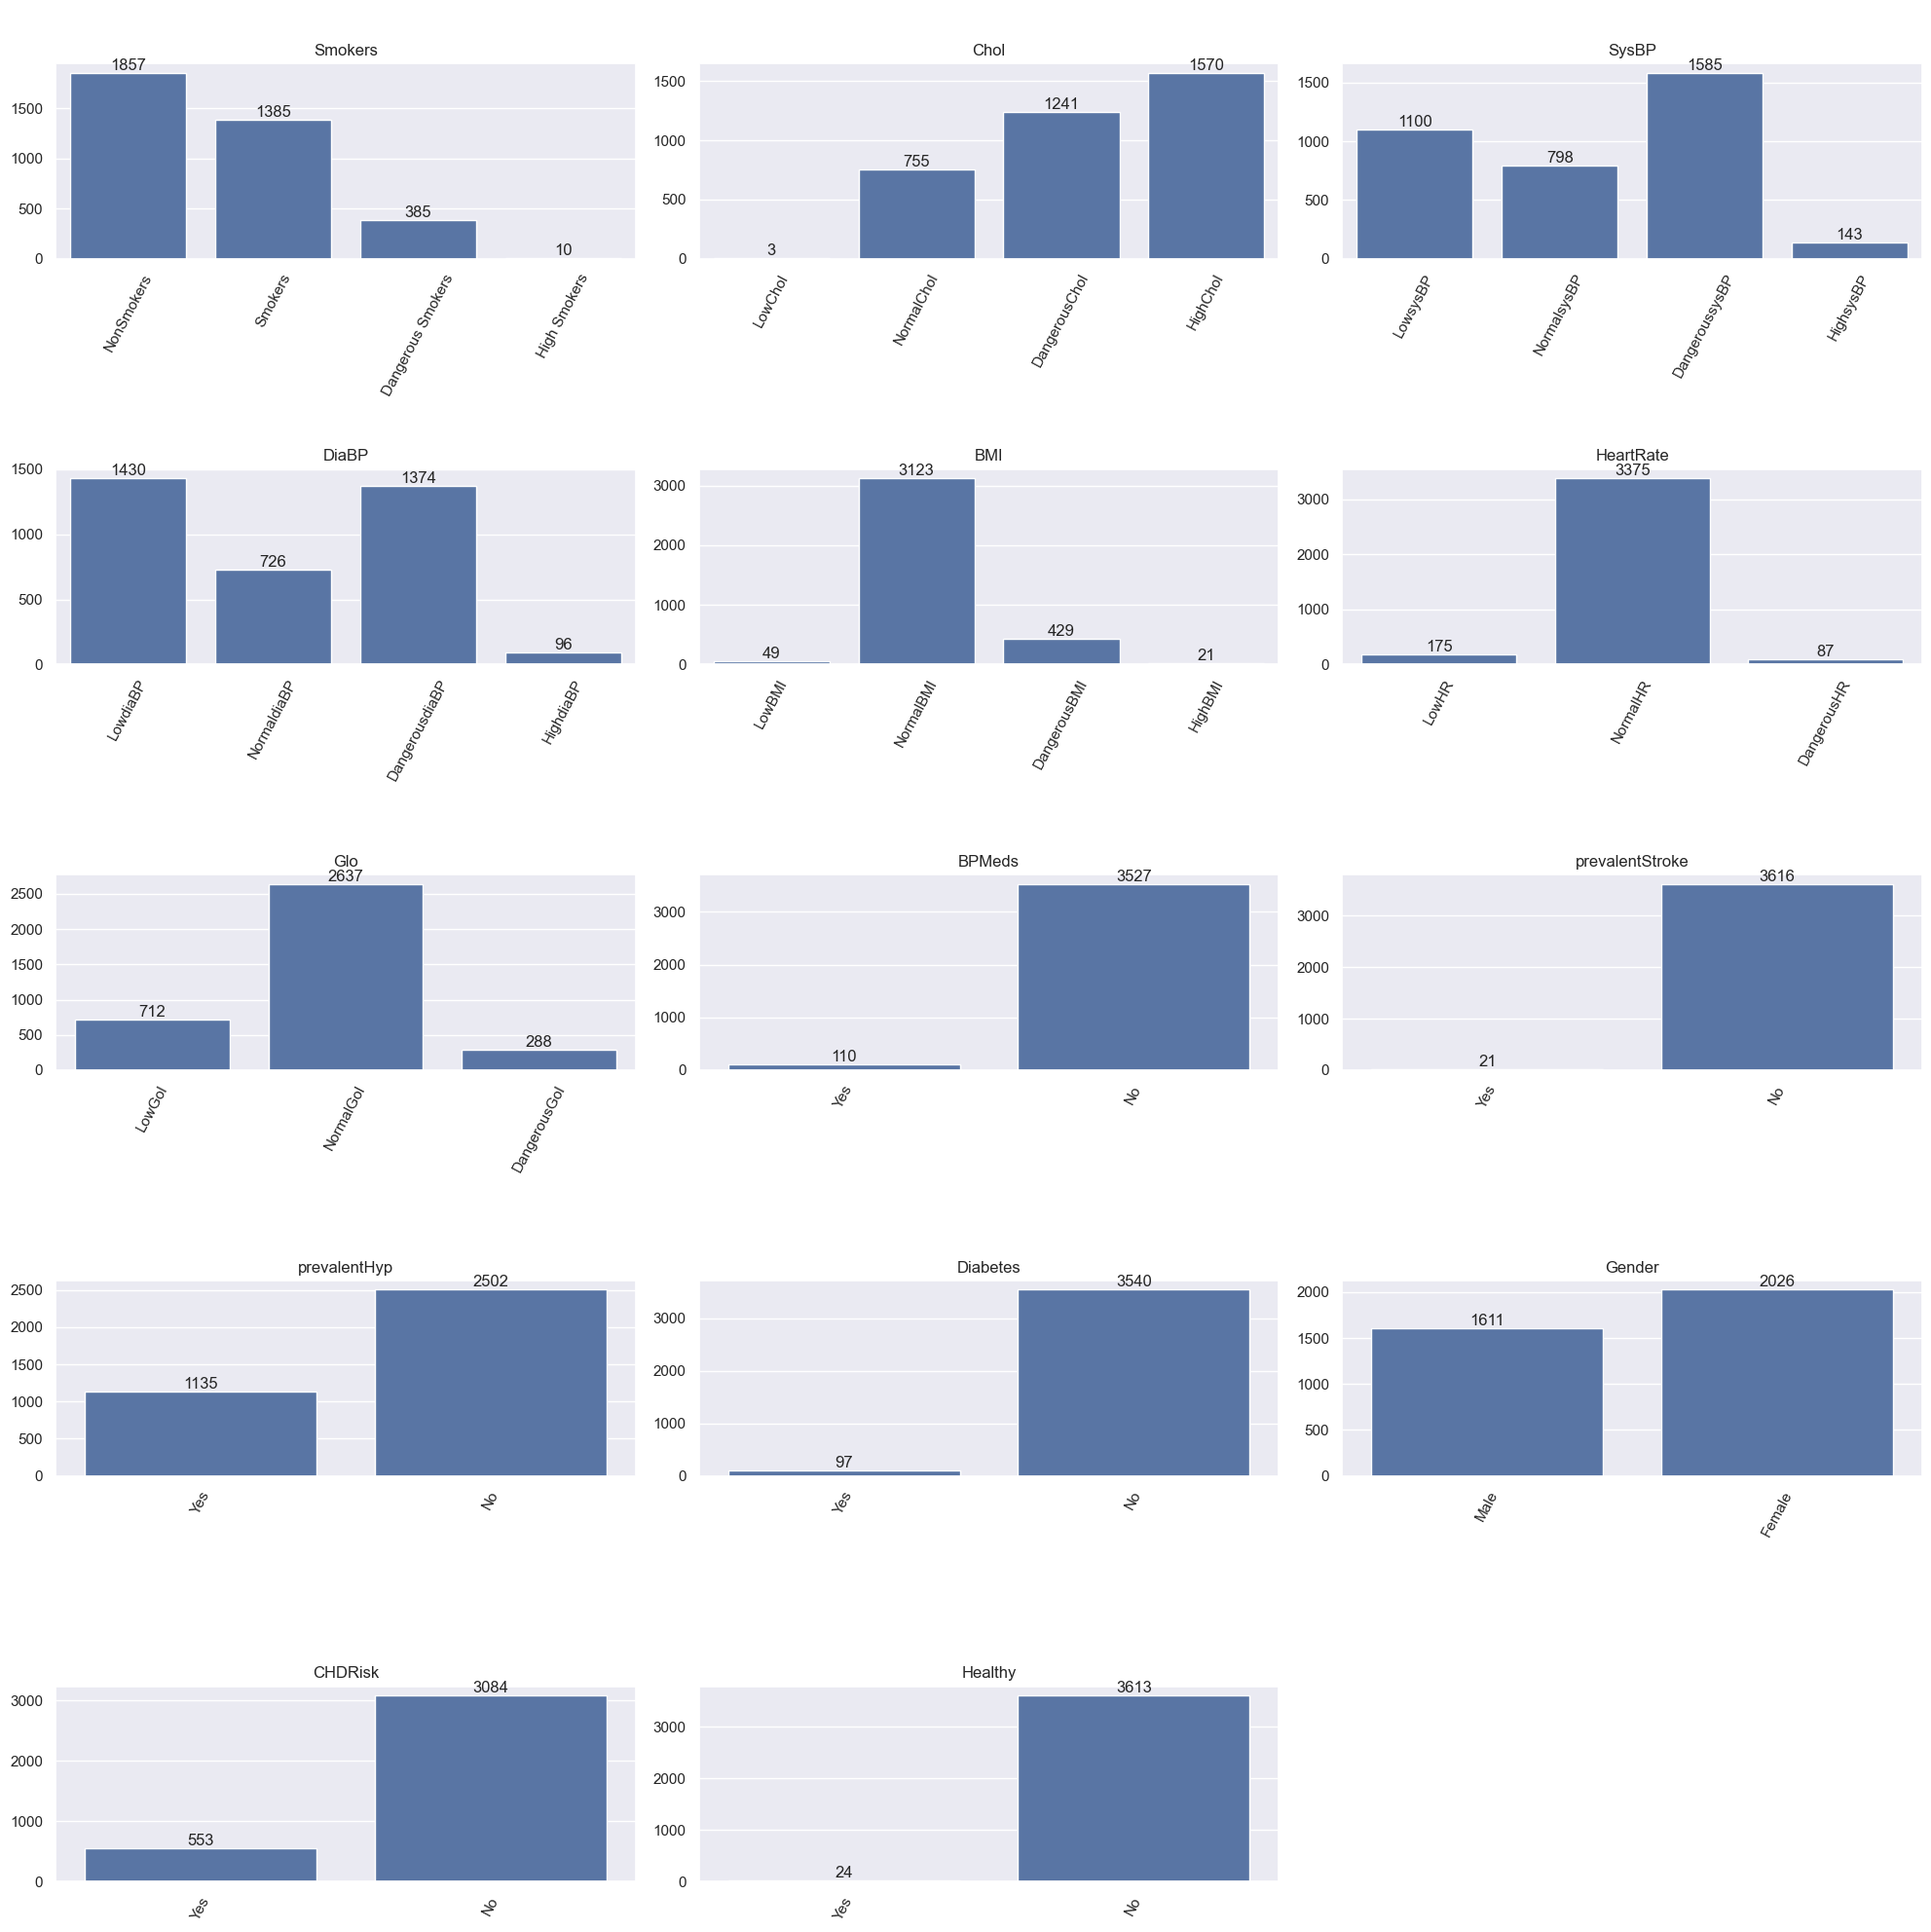

In [237]:
# SMOKERS
Smokers = {'NonSmokers' : df[(df.cigsPerDay == 0)]['cigsPerDay'].count(),    'Smokers' :  df[(df.cigsPerDay > 0) & (df.cigsPerDay <= 20)]['cigsPerDay'].count(),   'Dangerous Smokers' : df[(df.cigsPerDay > 20) & (df.cigsPerDay <= 50)]['cigsPerDay'].count(), 'High Smokers' : df[(df.cigsPerDay > 50)]['cigsPerDay'].count()}

#CHOLESTROUL
Chol = {'LowChol' : df[(df.totChol < 125)]['totChol'].count(),  'NormalChol' : df[(df.totChol > 125) & (df.totChol <= 200)]['totChol'].count(),  'DangerousChol' : df[(df.totChol > 200) & (df.totChol <= 239)]['totChol'].count(),  'HighChol' : df[(df.totChol > 240)]['totChol'].count()}

#SYSBP
SysBP = {'LowsysBP' : df[(df.sysBP < 120)]['sysBP'].count(),   'NormalsysBP' : df[(df.sysBP >= 120) & (df.sysBP <= 129)]['sysBP'].count(),    'DangeroussysBP' : df[(df.sysBP >= 130) & (df.sysBP <= 179)]['sysBP'].count(),    'HighsysBP' :  df[(df.sysBP >= 180)]['sysBP'].count()}

#DIABP
DiaBP = {'LowdiaBP' : df[(df.diaBP < 80)]['diaBP'].count(),   'NormaldiaBP' : df[(df.diaBP >= 80) & (df.diaBP <= 84)]['diaBP'].count(),    'DangerousdiaBP' : df[(df.diaBP >= 85) & (df.diaBP <= 109)]['diaBP'].count(),    'HighdiaBP' : df[(df.diaBP >= 110)]['diaBP'].count()}

#BMI
BMI = {'LowBMI' : df[(df.BMI < 18.5)]['BMI'].count(),   'NormalBMI' : df[(df.BMI >= 18.5) & (df.BMI <= 29.9)]['BMI'].count(),   'DangerousBMI' : df[(df.BMI >= 30) & (df.BMI <= 39.9)]['BMI'].count(),    'HighBMI' : df[(df.BMI >= 40)]['BMI'].count()}

#HEARTRATE
HeartRate = {'LowHR' : df[(df.heartRate < 60)]['heartRate'].count(),    'NormalHR' : df[(df.heartRate >=60) & (df.heartRate <= 100)]['heartRate'].count(),    'DangerousHR' : df[(df.heartRate > 100)]['heartRate'].count()}

#GLOCOUS
Glo = {'LowGol' : df[(df.glucose < 70)]['glucose'].count(),   'NormalGol' : df[(df.glucose >= 70) & (df.glucose <= 100)]['glucose'].count(),   'DangerousGol' : df[(df.glucose > 100)]['glucose'].count()}

BPMeds = {'Yes' : df[(df.BPMeds == 'yes')]['BPMeds'].count(), 'No' : df[(df.BPMeds == 'no')]['BPMeds'].count()}

prevalentStroke	= {'Yes' : df[(df.prevalentStroke == 'yes')]['prevalentStroke'].count(), 'No' : df[(df.prevalentStroke == 'no')]['prevalentStroke'].count()}

prevalentHyp = {'Yes' : df[(df.prevalentHyp == 'yes')]['prevalentHyp'].count(), 'No' : df[(df.prevalentHyp == 'no')]['prevalentHyp'].count()}

gender = {"Male" : df[df.gender == 'male']['gender'].count(), 'Female' : df[df.gender == 'female']['gender'].count()}

CHDRisk = {'Yes' : df[(df.CHDRisk == 'yes')]['CHDRisk'].count(), 'No' : df[(df.CHDRisk == 'no')]['CHDRisk'].count()}

Diabetes = {'Yes' : df[(df.diabetes == 'yes')]['diabetes'].count(), 'No' : df[(df.diabetes == 'no')]['diabetes'].count()}

Healthy = {'Yes' : df[(df.healthy == 'yes')]['healthy'].count(), 'No' : df[(df.healthy == 'no')]['healthy'].count()}



dicts = [Smokers, Chol, SysBP, DiaBP, BMI, HeartRate, Glo, BPMeds, prevalentStroke, prevalentHyp,Diabetes ,gender, CHDRisk, Healthy]

dicts_title = ['Smokers', 'Chol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glo', 'BPMeds', 'prevalentStroke', 'prevalentHyp',  'Diabetes','Gender',  'CHDRisk', 'Healthy', ]

plt.figure(figsize=(20, 20))

from matplotlib.ticker import FixedLocator
for e, dict in enumerate(dicts):
    d = pd.DataFrame(dict.items(), columns=['Classification', 'Value'])
    plt.subplot(5, 3, e+1)
    ax = sns.barplot(data= d, x= 'Classification', y = 'Value')
    ax.bar_label(ax.containers[0])
    ax.set_title('\n\n' + dicts_title[e])
    ax.set_xlabel('')  # Remove the x-axis label 'Classification'
    ax.set_ylabel('')  # Remove the x-axis label 'Value'
      # Get the current locations and labels.
    locs, labels = plt.xticks()
    
    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62) 
plt.tight_layout()
plt.show();
    


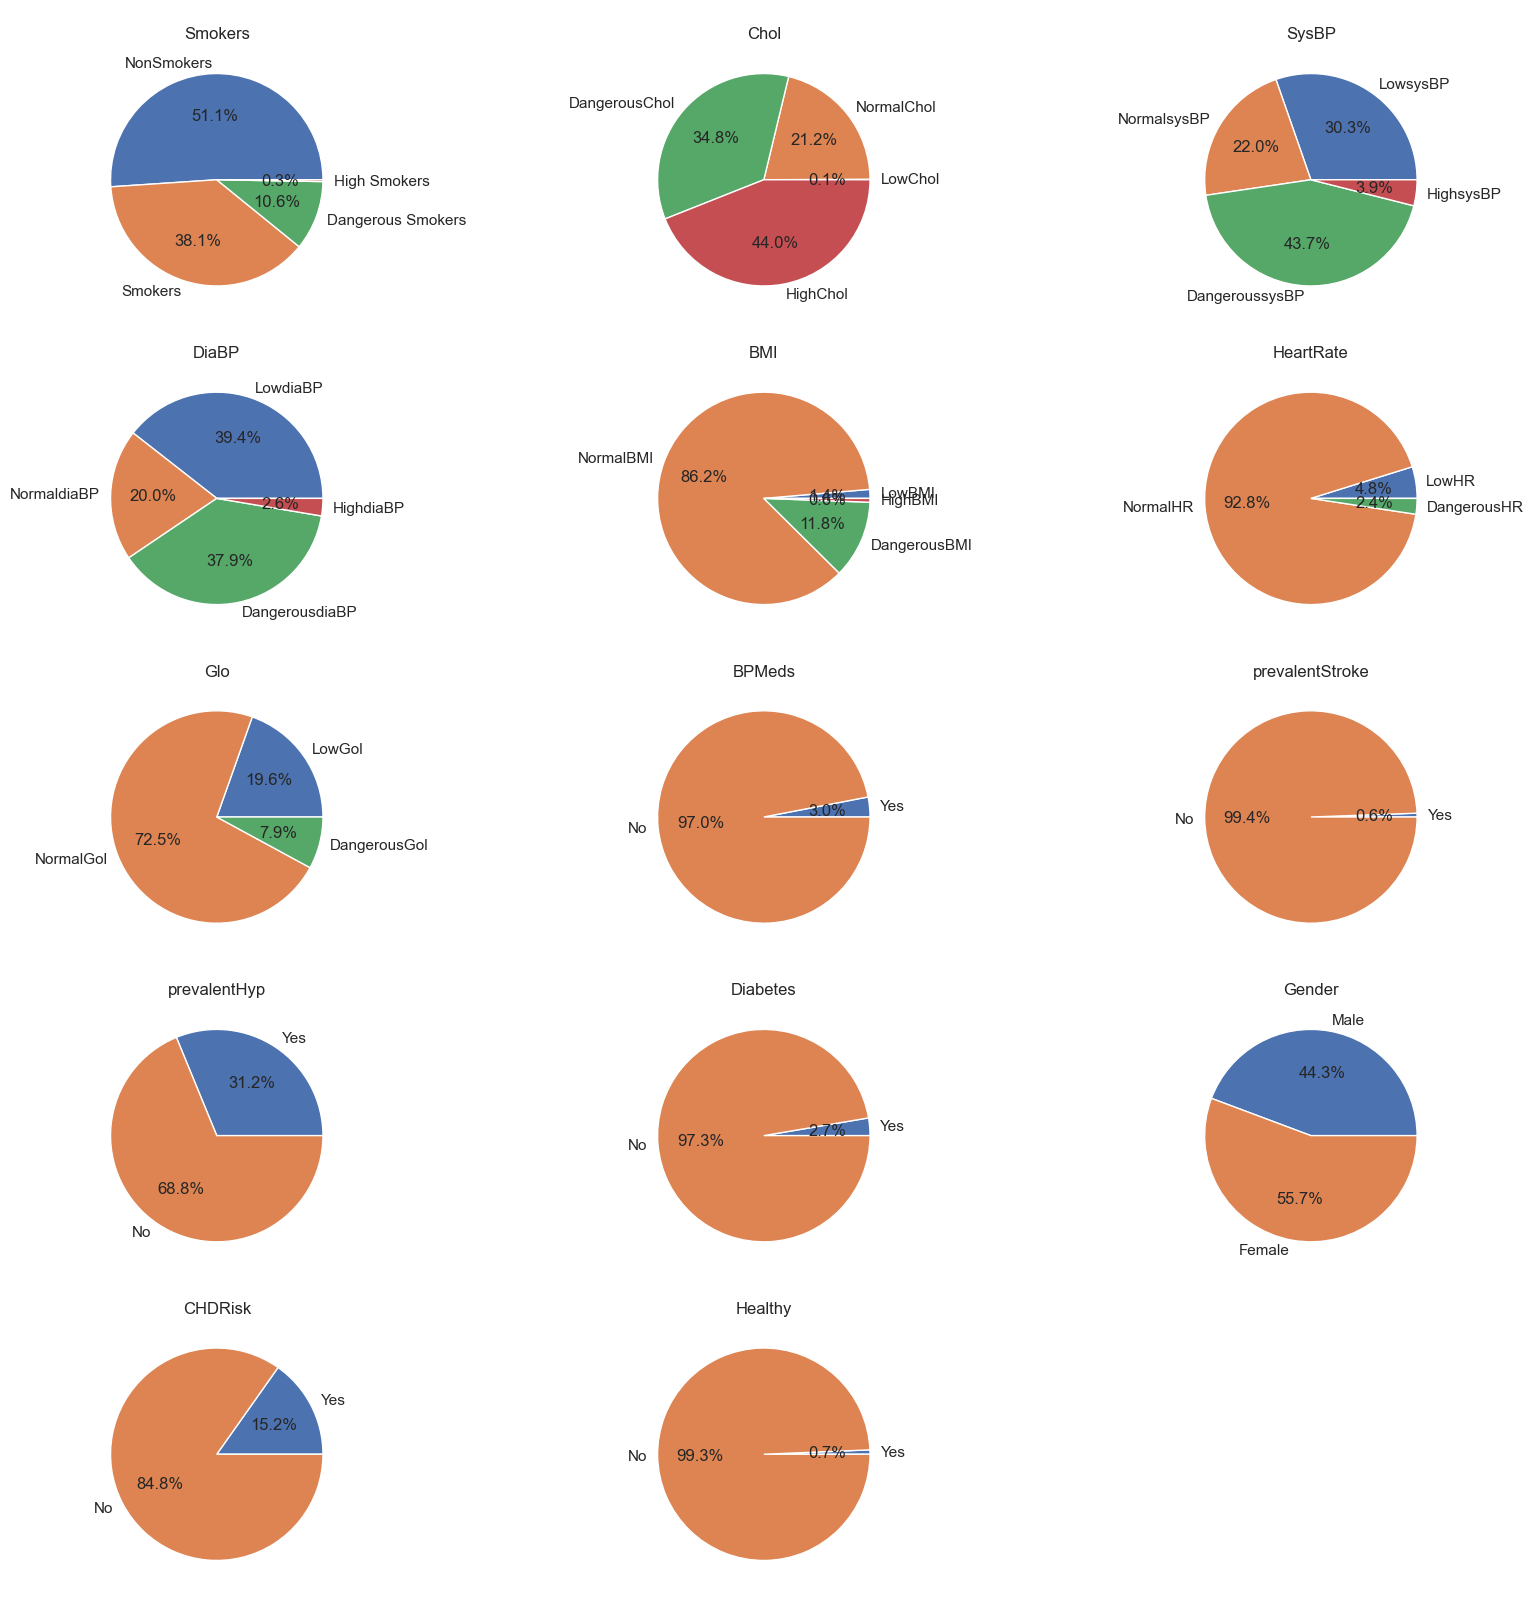

In [238]:
plt.figure(figsize=(20,20))
for e, dict in enumerate(dicts):
    d = pd.DataFrame(dict.items(), columns=['Classification', 'Value'])
    plt.subplot(5, 3, e+1)
    
    # Create a pie plot
    plt.pie(d['Value'], labels=d['Classification'], autopct='%1.1f%%')
    
    # Set the title for each subplot
    plt.title('\n' + dicts_title[e])

# plt.tight_layout()
plt.show()

<table style="border-collapse: collapse; width: 408pt;" border="0" width="544" cellspacing="0" cellpadding="0">
<tbody>
<tr style="height: 14.25pt;">
<td class="xl65" style="height: 14.25pt; width: 51pt;" width="68" height="19">&nbsp;</td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">Smokers (CigsPerDay)</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">Cholestrol</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">SysBP</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">DiaBP</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">BMI</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">HeartRate</span></td>
<td class="xl66" style="border-left: none; width: 51pt;" width="68"><span style="color: #ffff00;">Glocous</span></td>
</tr>
<tr style="height: 14.25pt;">
<td class="xl66" style="height: 14.25pt; border-top: none;" height="19"><span style="color: #ff9900;">None</span></td>
<td class="xl65" style="border-top: none; border-left: none;">1857</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
</tr>
<tr style="height: 14.25pt;">
<td class="xl66" style="height: 14.25pt; border-top: none;" height="19"><span style="color: #ff9900;">Low</span></td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">3</td>
<td class="xl65" style="border-top: none; border-left: none;">1100</td>
<td class="xl65" style="border-top: none; border-left: none;">1430</td>
<td class="xl65" style="border-top: none; border-left: none;">49</td>
<td class="xl65" style="border-top: none; border-left: none;">175</td>
<td class="xl65" style="border-top: none; border-left: none;">727</td>
</tr>
<tr style="height: 14.25pt;">
<td class="xl66" style="height: 14.25pt; border-top: none;" height="19"><span style="color: #ff9900;">Normal</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">1385</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">755</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">798</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">741</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">3138</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">3390</span></td>
<td class="xl65" style="border-top: none; border-left: none;"><span style="color: #ff9900;">2637</span></td>
</tr>
<tr style="height: 14.25pt;">
<td class="xl66" style="height: 14.25pt; border-top: none;" height="19"><span style="color: #ff9900;">Dangerous</span></td>
<td class="xl65" style="border-top: none; border-left: none;">400</td>
<td class="xl65" style="border-top: none; border-left: none;">1256</td>
<td class="xl65" style="border-top: none; border-left: none;">1600</td>
<td class="xl65" style="border-top: none; border-left: none;">1374</td>
<td class="xl65" style="border-top: none; border-left: none;">429</td>
<td class="xl65" style="border-top: none; border-left: none;">87</td>
<td class="xl65" style="border-top: none; border-left: none;">288</td>
</tr>
<tr style="height: 14.25pt;">
<td class="xl66" style="height: 14.25pt; border-top: none;" height="19"><span style="color: #ff9900;">High</span></td>
<td class="xl65" style="border-top: none; border-left: none;">10</td>
<td class="xl65" style="border-top: none; border-left: none;">1570</td>
<td class="xl65" style="border-top: none; border-left: none;">143</td>
<td class="xl65" style="border-top: none; border-left: none;">96</td>
<td class="xl65" style="border-top: none; border-left: none;">21</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
<td class="xl65" style="border-top: none; border-left: none;">&nbsp;</td>
</tr>
</tbody>
</table>

In [239]:
df[df.healthy == 'yes']

,gender,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,healthy
119,female,50,3,yes,15,no,no,no,no,150,121.00,84.00,28.69,75,88,no,yes
190,male,45,4,yes,18,no,no,no,no,176,124.00,84.00,20.27,77,75,no,yes
419,female,39,2,no,0,no,no,no,no,190,120.00,80.00,27.16,70,85,no,yes
625,female,38,2,yes,1,no,no,no,no,200,124.00,84.00,20.67,80,75,no,yes
1046,female,40,1,yes,15,no,no,no,no,199,122.00,82.00,22.16,85,77,no,yes
1061,male,40,1,no,0,no,no,no,no,137,127.00,82.00,27.04,60,71,no,yes
1156,female,39,3,no,0,no,no,no,no,180,124.00,83.00,22.91,66,77,no,yes
1209,male,36,4,no,0,no,no,no,no,172,122.50,82.50,28.53,82,75,no,yes
1380,male,53,1,no,0,no,no,no,no,157,123.00,83.00,19.94,75,88,no,yes
1824,female,40,3,yes,5,no,no,no,no,143,125.50,80.00,21.99,71,95,no,yes


# MultiVariate Analysis

In [240]:
df.head()

,gender,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,healthy
0,male,39,4,no,0,no,no,no,no,195,106.00,70.00,26.97,80,77,no,no
1,female,46,2,no,0,no,no,no,no,250,121.00,81.00,28.73,95,76,no,no
2,male,48,1,yes,20,no,no,no,no,245,127.50,80.00,25.34,75,70,no,no
3,female,61,3,yes,30,no,no,yes,no,225,150.00,95.00,28.58,65,103,yes,no
4,female,46,3,yes,23,no,no,no,no,285,130.00,84.00,23.10,85,85,no,no


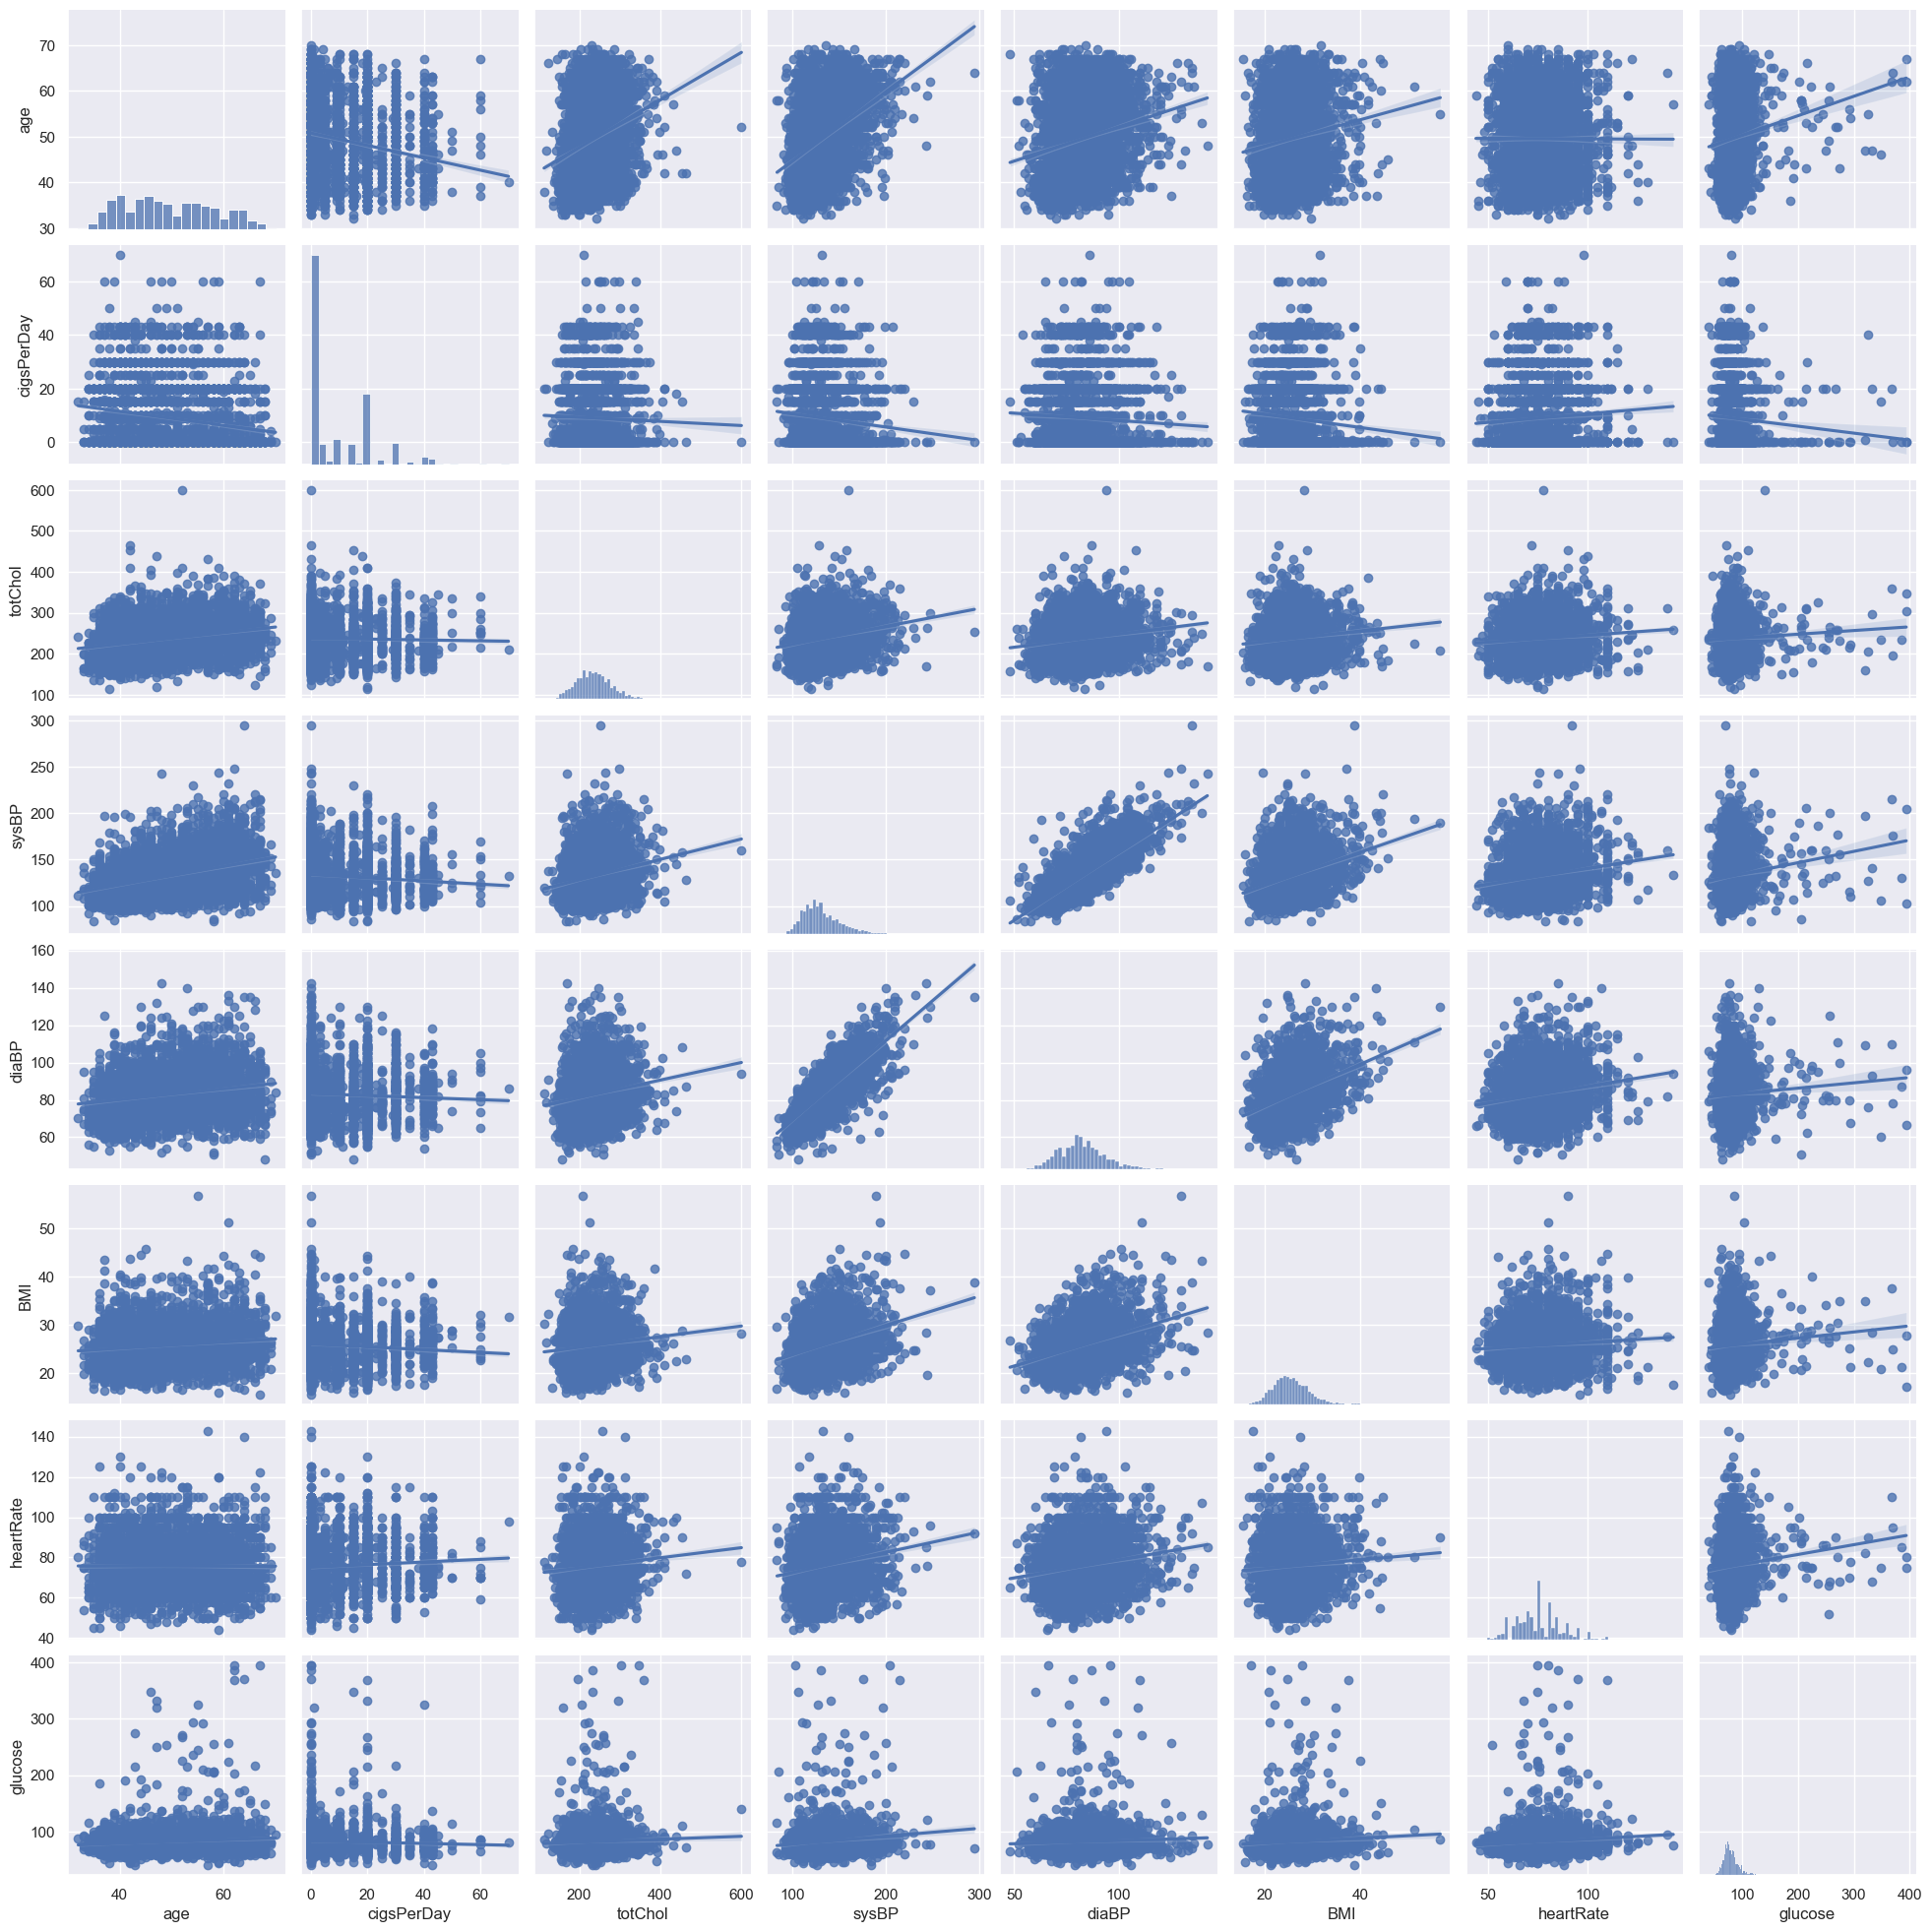

In [241]:
pairs = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
sns.pairplot(pairs, kind='reg');

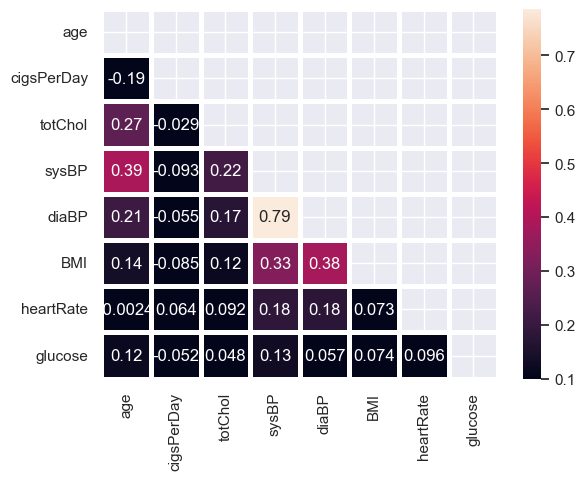

In [242]:
mask = np.zeros_like(pairs.corr())
mask[np.triu_indices_from(mask)] = True
mask
sns.heatmap(pairs.corr(), annot=True, vmin=0.1, mask=mask, linewidths=2.5);

In [243]:
bool = df[['gender','smokingStatus', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'CHDRisk', 'healthy']]

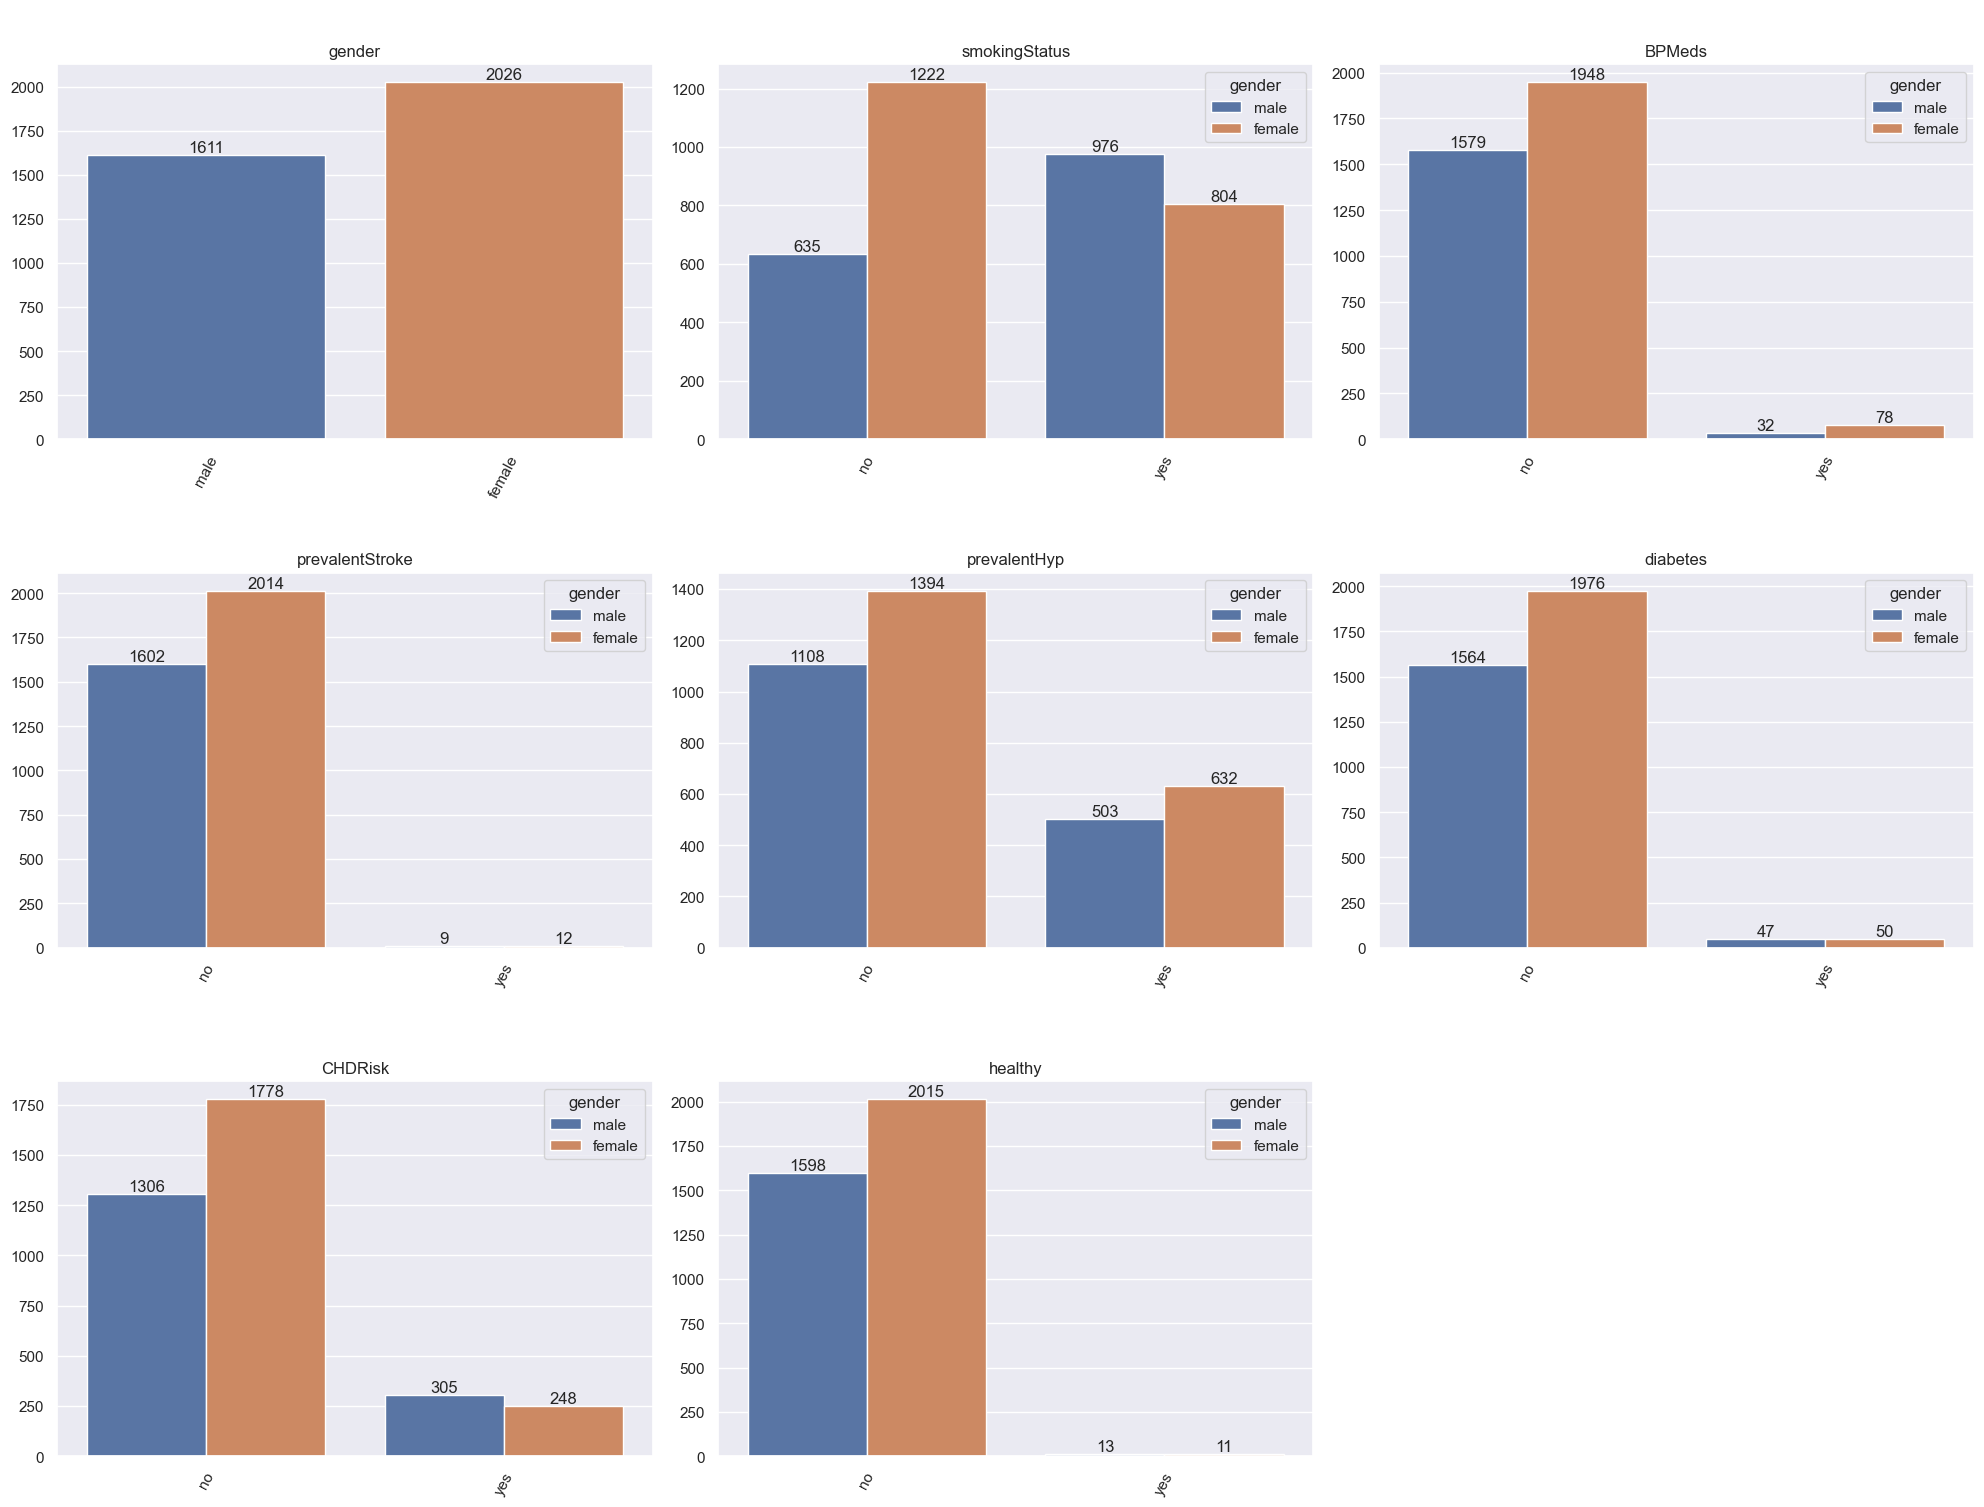

In [244]:
plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool):
    
    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data= bool, x= col, hue = 'gender')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')  # Remove the x-axis label 'Classification'
    ax.set_ylabel('')  # Remove the x-axis label 'Value'c
      # Get the current locations and labels.
    locs, labels = plt.xticks()
    
    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62) 
plt.tight_layout()
plt.show();

In [245]:
bool_male = bool[bool.gender == 'male']
bool_female = bool[bool.gender == 'female']

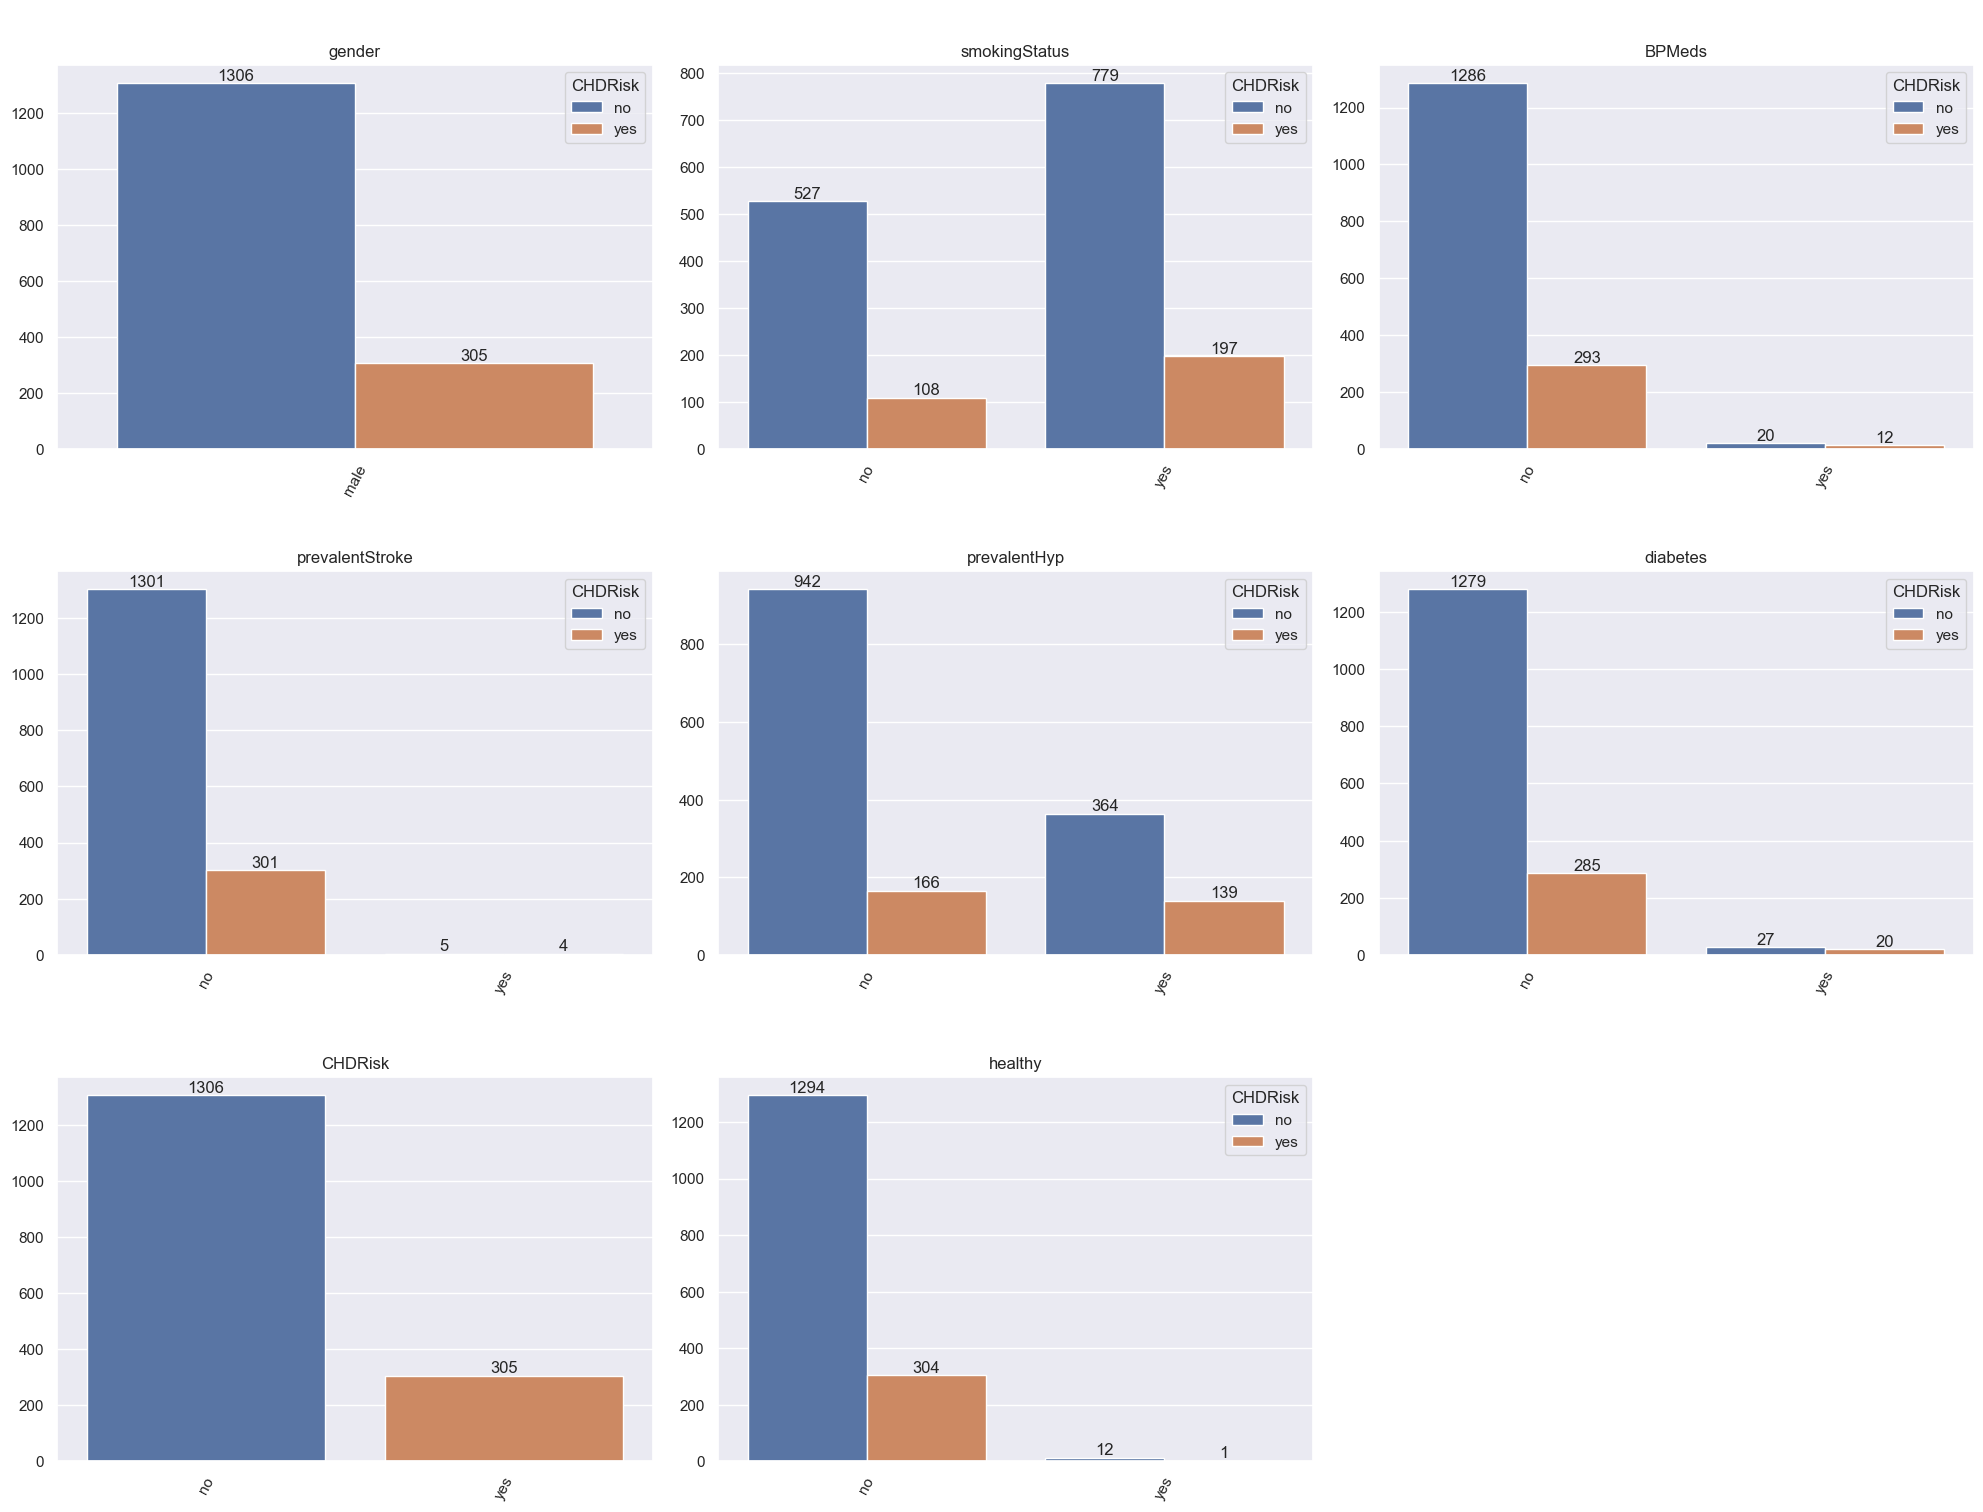

In [246]:


plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool_male):
    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data= bool_male, x= col, hue = 'CHDRisk')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')  # Remove the x-axis label 'Classification'
    ax.set_ylabel('')  # Remove the x-axis label 'Value'c
      # Get the current locations and labels.
    locs, labels = plt.xticks()
    
    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62) 
plt.tight_layout()
plt.show();

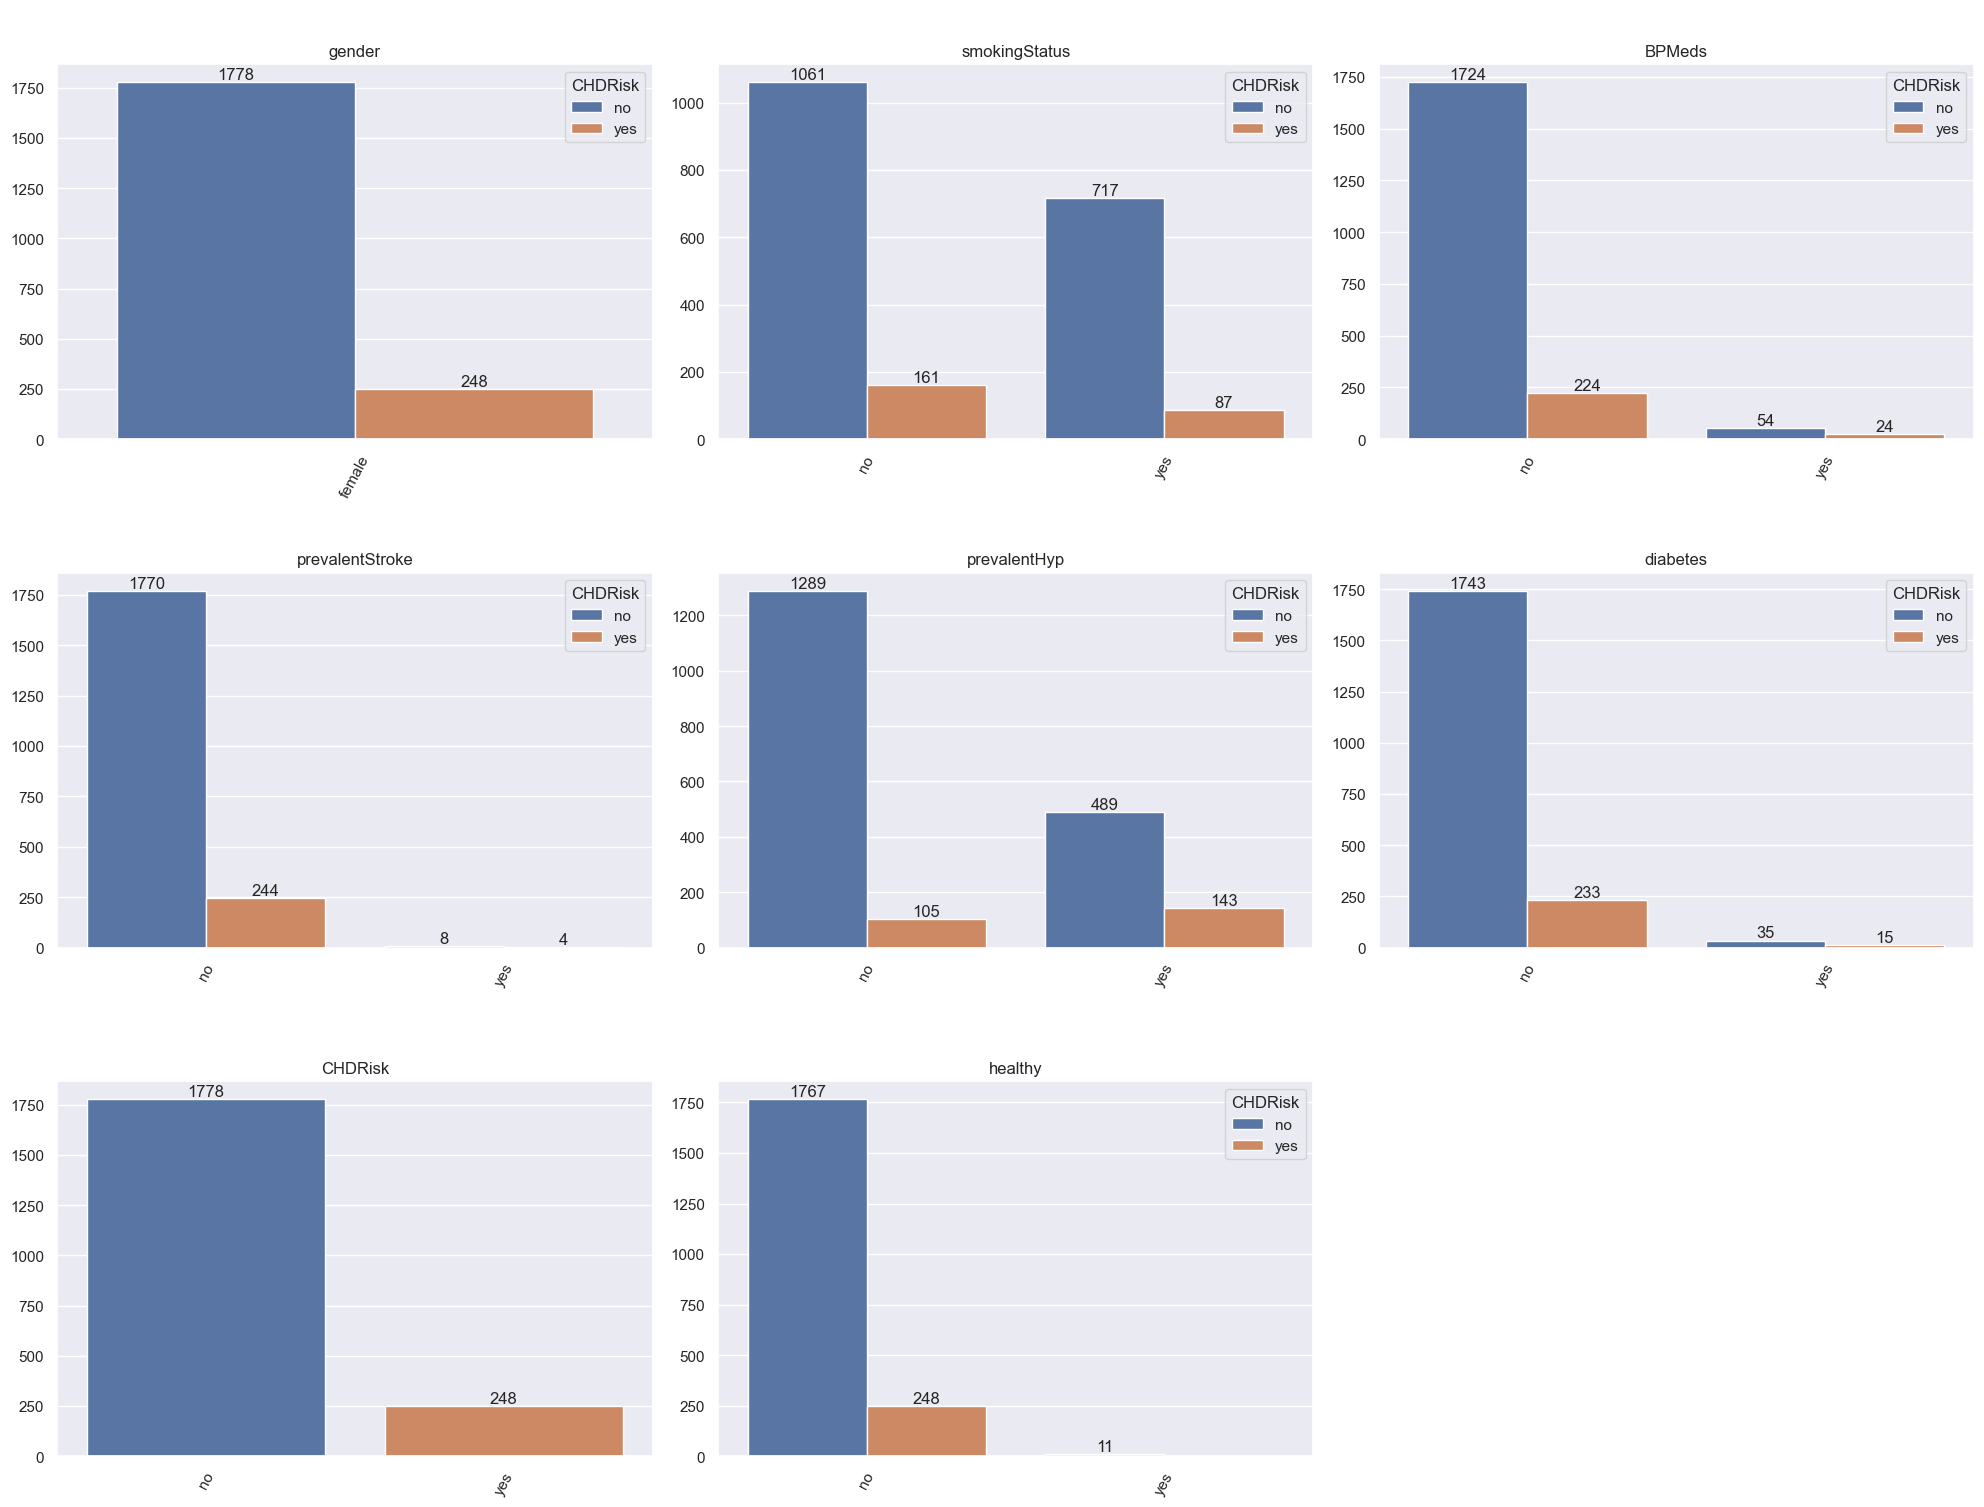

In [247]:


plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool_female):
    
    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data= bool_female, x= col, hue = 'CHDRisk')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')  # Remove the x-axis label 'Classification'
    ax.set_ylabel('')  # Remove the x-axis label 'Value'c
      # Get the current locations and labels.
    locs, labels = plt.xticks()
    
    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62) 
plt.tight_layout()
plt.show();

# Logistic Regression

In [248]:
df.head()

,gender,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,healthy
0,male,39,4,no,0,no,no,no,no,195,106.00,70.00,26.97,80,77,no,no
1,female,46,2,no,0,no,no,no,no,250,121.00,81.00,28.73,95,76,no,no
2,male,48,1,yes,20,no,no,no,no,245,127.50,80.00,25.34,75,70,no,no
3,female,61,3,yes,30,no,no,yes,no,225,150.00,95.00,28.58,65,103,yes,no
4,female,46,3,yes,23,no,no,no,no,285,130.00,84.00,23.10,85,85,no,no


In [ ]:
df_dummy = df.copy()

In [ ]:
df_dummy.gender = df_dummy.gender.replace('male', 1)
df_dummy.gender = df_dummy.gender.replace('female', 0)
df_dummy.head()

In [ ]:

for col in df_dummy.columns:

    df_dummy[col] = df_dummy[col].replace('yes', 1)
    df_dummy[col] = df_dummy[col].replace('no', 0)


In [ ]:
df_dummy = df_dummy.drop(['education', 'healthy'], axis=1)

In [255]:
df_dummy.sample(10)

,gender,age,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
2568,0,58,1,5,0,0,1,0,240,150.00,84.00,26.85,75,94,1
1060,1,41,0,0,0,0,0,0,255,120.50,85.50,30.85,100,79,0
19,0,42,1,30,0,0,0,0,190,108.00,70.50,21.59,72,85,0
3120,1,65,1,25,0,0,0,0,215,147.50,95.00,29.08,82,88,1
3571,1,55,0,0,0,0,0,0,231,105.00,82.00,27.73,75,66,0
1715,1,43,0,0,1,0,1,0,234,173.00,96.00,27.99,100,76,0
2241,1,59,1,40,0,0,1,0,243,162.00,91.00,33.00,85,81,1
3092,0,48,0,0,0,0,0,0,244,117.00,81.50,28.96,67,78,0
2132,0,55,0,0,0,0,0,0,260,136.50,87.50,25.41,75,60,0
3453,0,55,0,0,0,0,1,0,268,140.00,88.00,26.99,85,117,0


In [257]:
df_dummy['intercept']= 1
logit_mod = sm.Logit(df_dummy['CHDRisk'], df_dummy[['intercept', 'gender' , 'age', 'smokingStatus', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

#fit the model
results = logit_mod.fit()

#get summary statistics
results.summary() 

Optimization terminated successfully.
         Current function value: 0.376085
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                CHDRisk   No. Observations:                 3637
Model:                          Logit   Df Residuals:                     3622
Method:                           MLE   Df Model:                           14
Date:                Sat, 10 Aug 2024   Pseudo R-squ.:                  0.1177
Time:                        00:30:32   Log-Likelihood:                -1367.8
converged:                       True   LL-Null:                       -1550.3
Covariance Type:            nonrobust   LLR p-value:                 3.115e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -8.5961      0.700    -12.285      0.000      -9.968      -7.225
gender              0.5581      0.110      5.093      0.000       0.343       0.773
age                 0.0634      0.007      9.524      0.000       0.050       0.076
smokingStatus       0.0661      0.157      0.420      0.675      -0.242       0.375
cigsPerDay          0.0185      0.006      2.958      0.003       0.006       0.031
BPMeds              0.1143      0.237      0.483      0.629      -0.350       0.578
prevalentStroke     0.7165      0.490      1.463      0.143      -0.243       1.676
prevalentHyp        0.2163      0.138      1.562      0.118      -0.055       0.488
diabetes            0.0827      0.316      0.262      0.794      -0.537       0.702
totChol             0.0023      0.001      2.059      0.039       0.000       0.005
sysBP               0.0161      0.004      4.240      0.000       0.009       0.024
diaBP              -0.0045      0.006     -0.704      0.481      -0.017       0.008
BMI                 0.0110      0.013      0.861      0.389      -0.014       0.036
heartRate          -0.0033      0.004     -0.784      0.433      -0.012       0.005
glucose             0.0072      0.002      3.213      0.001       0.003       0.012
===================================================================================
"""

In [279]:
df_dummy['intercept']= 1
logit_mod =sm.Logit(df_dummy['CHDRisk'], df_dummy[['intercept', 'gender' , 'age',  'cigsPerDay', 'totChol', 'sysBP', 'glucose']])

#fit the model
results = logit_mod.fit()

#get summary statistics
results.summary() 

Optimization terminated successfully.
         Current function value: 0.377064
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                CHDRisk   No. Observations:                 3637
Model:                          Logit   Df Residuals:                     3630
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 Aug 2024   Pseudo R-squ.:                  0.1154
Time:                        01:56:53   Log-Likelihood:                -1371.4
converged:                       True   LL-Null:                       -1550.3
Covariance Type:            nonrobust   LLR p-value:                 3.346e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.1707      0.478    -19.180      0.000     -10.108      -8.234
gender         0.5687      0.107      5.296      0.000       0.358       0.779
age            0.0650      0.006     10.083      0.000       0.052       0.078
cigsPerDay     0.0195      0.004      4.647      0.000       0.011       0.028
totChol        0.0023      0.001      2.071      0.038       0.000       0.005
sysBP          0.0178      0.002      8.246      0.000       0.014       0.022
glucose        0.0076      0.002      4.470      0.000       0.004       0.011
==============================================================================
"""

In [280]:
for param in results.params[1:]:
    
    print(np.exp(param))

1.7660286371322824
1.067184501594335
1.0196542482415334
1.0023342722502226
1.0179626263987809
1.0076381340254708


In [281]:
results.params.index

Index(['intercept', 'gender', 'age', 'cigsPerDay', 'totChol', 'sysBP',
       'glucose'],
      dtype='object')

In [283]:
for param in results.params.index[2:]:
    print('for each 1 unit increase in {}, CHDRisk is {} times as likely holding all else constant.'.format(param, round(np.exp(results.params[param]),2)),'\n')

for each 1 unit increase in age, CHDRisk is 1.07 times as likely holding all else constant. 

for each 1 unit increase in cigsPerDay, CHDRisk is 1.02 times as likely holding all else constant. 

for each 1 unit increase in totChol, CHDRisk is 1.0 times as likely holding all else constant. 

for each 1 unit increase in sysBP, CHDRisk is 1.02 times as likely holding all else constant. 

for each 1 unit increase in glucose, CHDRisk is 1.01 times as likely holding all else constant. 

